In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse

In [2]:
# archivo = "../../data/fluke_01-07-2021_05-07-2021.csv"
def importa_fluke(archivo):
    tmp = pd.read_csv(archivo,usecols=[7,11],names=["fluke","tiempo"],skiprows=1)
    tmp.tiempo = pd.to_datetime(tmp.tiempo,dayfirst=True)
    tmp.set_index("tiempo",inplace=True)
    tmp.fluke = tmp.fluke.str.replace(" ppm","")
    tmp.fluke = tmp.fluke.astype("float64")
    return tmp


In [3]:
archivo = "../../data/fluke_20-07-2021_prueba.csv"
f1 = importa_fluke(archivo)
f1 = f1.asfreq("60S")
f1 = f1.resample("60S").interpolate(method="time")

In [4]:
tb = pd.read_csv("../../data/sensores_20-07-2021.csv",index_col=0,parse_dates=True)
sensores = tb.columns
# tb

In [5]:
datos = pd.concat([f1,tb],axis=0)
# datos.plot(subplots=True)
# datos.columns
ref = 'fluke'

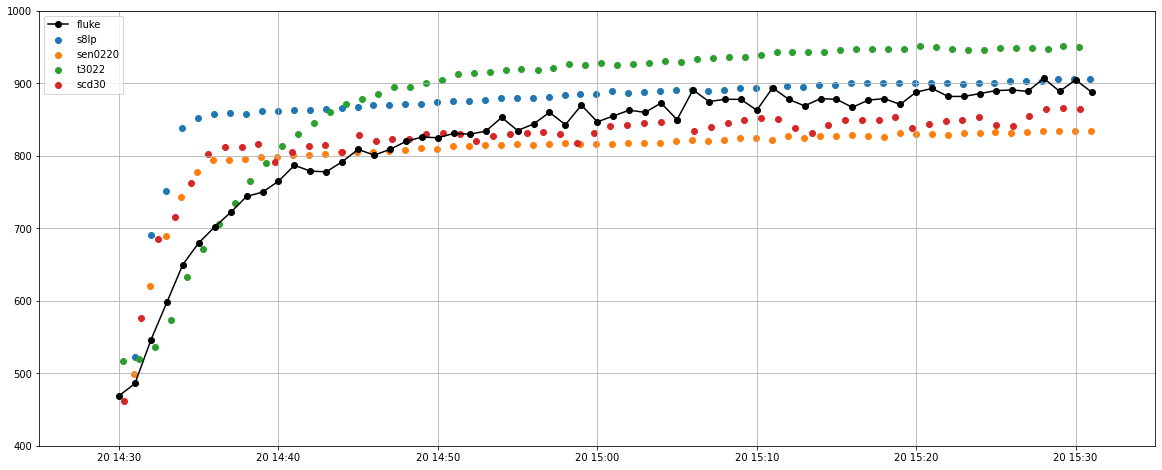

In [6]:
fig, ax = plt.subplots(figsize=(20,8))


fecha1 = parse("2021-07-20 14:25") 
fecha2 = fecha1 + pd.Timedelta("70min")
# fecha2 =  parse("2021-07-06 16:00") 
ax.set_xlim(fecha1,fecha2)

ax.set_ylim(400,1000)
ax.plot(datos[ref],"k-o",label=ref)
for sensor in sensores:
    ax.scatter(datos[sensor].index,datos[sensor],label=sensor,marker="o")

ax.grid()
ax.legend()

In [7]:
def variable(df=datos,sensor="fluke"):
    tmp = pd.DataFrame(df[sensor])
    tmp.dropna(inplace=True)
    return tmp


In [8]:
fluke   = variable(df=datos)
fluke = fluke.resample("1Min").interpolate(method="time")
s8lp    = variable(df=datos,sensor="s8lp")
sen0220 = variable(df=datos,sensor="sen0220")
t3022 = variable(df=datos,sensor="t3022")
scd30   = variable(df=datos,sensor="scd30")

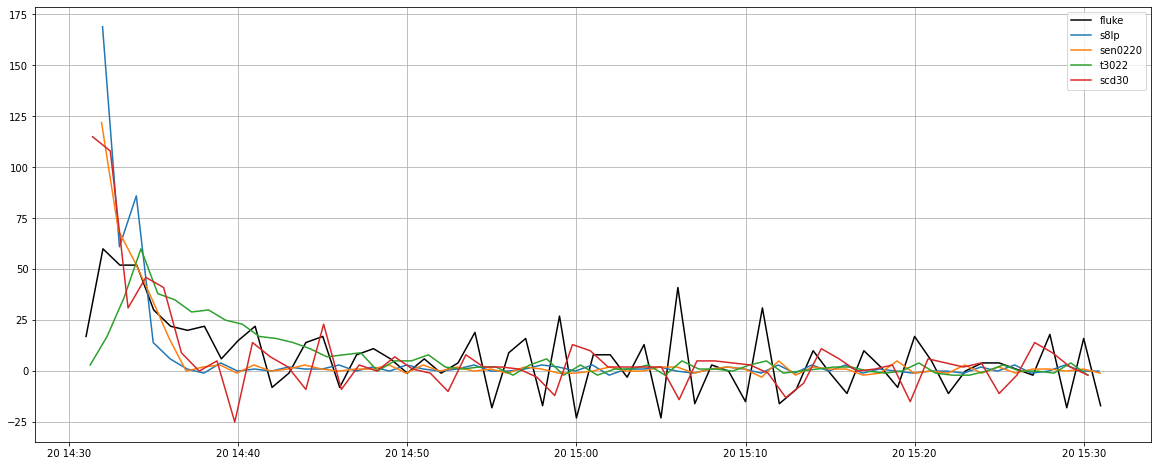

In [10]:
fig, ax = plt.subplots(figsize=(20,8))

ax.plot(fluke.diff(),"k-",label="fluke")
ax.plot(s8lp.diff()      ,label="s8lp")
ax.plot(sen0220.diff()   ,label="sen0220")
ax.plot(t3022.diff()     ,label="t3022")
ax.plot(scd30.diff()     ,label="scd30")

ax.grid()
ax.legend()